Для начала импортируем необходимые библиотеки:

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import ensemble #ансамбли

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

In [2]:
SEED = 42

[Информация](https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset) о данных

1. Прочитайте таблицу с данными ('data/online_shoppers_intention.csv') и выведите ее на экран, чтобы убедиться, что чтение прошло успешно.

In [3]:
data = pd.read_csv('sources/online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


2. Выведите размер таблицы

In [4]:
print(f'Shape of data: {data.shape}')

Shape of data: (12330, 18)


3. В нашей таблице содержится информация о более чем 12 тысячах сессий на сайте интернет-магазина. Каждая сессия описывается 18 признаками.
Удостоверьтесь в отсутствии пропусков:

In [5]:
# There are non-null the data in all of the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# There are non-null the data in all of the features

data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

4. Закодируйте категориальные признаки с помощью простого горячего кодирования, используя уже знакомую нам функцию get_dummies():

In [7]:
# Let's analyze objects

data.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [8]:
# We are ready to encoding (check last 5 ones)

dummies_data = pd.get_dummies(data, drop_first=True)

print(f'Shape of data: {dummies_data.shape}')
dummies_data.tail()

Shape of data: (12330, 27)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,False,False,False,False,False,False,False,False,False,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,True
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,False


5. Теперь, когда необходимые преобразования выполнены, мы можем говорить о построении модели.
6. Сбалансирована ли данная выборка? Обоснуйте свою позицию

Итак, нам необходимо предсказать целевую переменную Revenue — признак покупки. Целевой признак является бинарным категориальным, то есть мы решаем задачу бинарной классификации.
В первую очередь визуализируйте соотношение классов в данных:

<Axes: xlabel='Revenue', ylabel='count'>

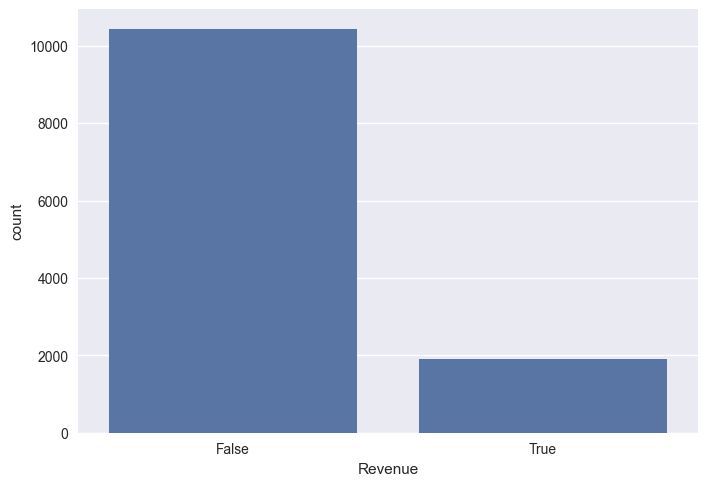

In [9]:
# So, we see strongly imbalance of classes.
# Finally, people buy about 2000 (about 15.47%) times and don't buy more then 10000

sns.countplot(data=dummies_data, x='Revenue')

7. Из 12330 сессий покупкой товара завершаются лишь 15.47 %. Мы знаем, что такое соотношение классов заставляет нас смотреть на метрики для каждого из классов отдельно.

Условимся, что лучшей будет считаться та модель, у которой значение метрики F1 для пользователей, совершивших покупку, будет наибольшим.

Разделите набор данных на матрицу наблюдений X и вектор ответов y:

In [10]:
X = dummies_data.drop(['Revenue'], axis=1)
y = dummies_data['Revenue']

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (12330, 26)
y shape: (12330,)


Давайте заранее определимся, как мы будем производить контроль качества наших моделей:

Разделим выборку на тренировочную и тестовую.
Будем проводить кросс-валидацию на тренировочной выборке (то есть будем делить её на тренировочные и валидационные фолды и считать среднее значение метрики по фолдам).
Итого мы будем использовать два показателя:

значение метрики на тренировочных и валидационных фолдах кросс-валидации (по ним мы будем отслеживать переобучение модели и подбирать внешние параметры);
значение метрики на отложенной тестовой выборке (оно будет нашим контрольным показателем).
Другими словами, мы будем сочетать hold-оut- и k-fold-подходы к валидации.

8. Для начала позаботимся о создании отложенной тестовой выборки.

Разделите выборку на тренировочную и тестовую в соотношении 80/20. Используйте разбиение, стратифицированное по целевому признаку. В качестве значения параметра random_state возьмите число 42.

Чему равно количество сессий на сайте в тренировочной выборке?

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X,
    y,
    stratify=y,
    random_state=SEED,
    test_size=0.2
)

9. Расчитайте количество сессий в тестовой выборке:

In [12]:
print('Sessions count for train:', y_train.shape[0])
print('Sessions count for test:', y_test.shape[0])

Sessions count for train: 9864
Sessions count for test: 2466


10.Коллеги посоветовали нам использовать случайный лес (Random Forest) для решения данной задачи. Давайте последуем их совету.

Создайте модель случайного леса. В качестве значения параметра random_state возьмите число 42. Остальные параметры оставьте по умолчанию.

Оцените качество такой модели с помощью кросс-валидации по пяти фолдам. Так как классы несбалансированы, используйте кросс-валидатор StratifiedKFold (перемешивать выборку не нужно).

Для проведения кросс-валидации используйте функцию cross_validate(). Набор данных (параметры X, y) — тренировочная выборка (X_train, y_train). Метрика — F1-score.

Расчитайте, чему равно среднее значение метрики  на тренировочных и валидационных фолдах?

In [13]:
# Let's create Random Forest class object

rf_model = ensemble.RandomForestClassifier(
    random_state=SEED
)

rf_model.fit(X_train, y_train)

train_scores = metrics.f1_score(y_train, rf_model.predict(X_train))

In [14]:
# Realize stratifed cross-validation on 5 folds

class CrossValidation:

    def __init__(self, n_splits=5, shuffle=False, **kwargs):
        self.skf = model_selection.StratifiedKFold(
            n_splits=n_splits,
            shuffle=shuffle,
            **kwargs
        )

        self.cv_method = {
            'cross_val_score': self._cross_val_score,
            'custom': self._custom,
            'learning_curve': self._learning_curve
        }


    def _cross_val_score(self, X, y, rf_model):
        '''CV with using cross_val_score function'''
        scores = model_selection.cross_val_score(
            rf_model,
            X,
            y,
            cv=self.skf,
            scoring='f1'
        )

        avg_score = np.mean(scores)

        return scores, avg_score


    def _custom(self, X, y, rf_model):
        '''Custom cv on for loop'''
        f1_trains = []
        f1_tests = []

        for i, split_idxs in enumerate(self.skf.split(X, y)):
            train_idx, test_idx = split_idxs

            X_current = X.iloc[train_idx]
            X_test_current = X.iloc[test_idx]
            y_current = y.iloc[train_idx]
            y_test_current = y.iloc[test_idx]

            rf_model.fit(X_current, y_current)

            y_pred = rf_model.predict(X_current)
            y_test_pred = rf_model.predict(X_test_current)

            f1_train = metrics.f1_score(y_current, y_pred)
            f1_test = metrics.f1_score(y_test_current, y_test_pred)

            print(f'For {i+1} fold:\n\t-Train: {f1_train}\n\t-Test: {f1_test}')

            f1_trains.append(f1_train)
            f1_tests.append(f1_test)

        avg_train = np.mean(f1_trains)
        avg_test = np.mean(f1_tests)

        return avg_train, avg_test


    def _learning_curve(self, X, y, rf_model):
        '''CV with learning_curve function'''
        train_sizes, \
        train_scores, \
        test_scores = \
            model_selection.learning_curve(
                rf_model,
                X,
                y,
                cv=self.skf,
                scoring='f1'
            )
        
        # Calculate mean and std f1-score for every fold
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)

        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        
        return (
            train_sizes, 
            train_scores, 
            test_scores, 
            train_mean, 
            train_std, 
            test_mean, 
            test_std
        )


    def cross_validate(
        self, 
        X_train,
        y_train,
        rf_model,
        cv_method: str='custom'
    ):
        result = self.cv_method[cv_method](X_train, y_train, rf_model)

        return result
    

CV = CrossValidation()

In [15]:
# Let's calculate f1_metric

rf_scores, avg_score = CV.cross_validate(
    X_train, y_train, rf_model, cv_method='cross_val_score'
)

rf_scores, avg_score = CV.cross_validate(
    X_test, y_test, rf_model, cv_method='cross_val_score'
)

print('F1 for every folds:', rf_scores)
print('F1 train_score:', train_scores)
print('F1 avg:', avg_score)

F1 for every folds: [0.60740741 0.56666667 0.58394161 0.52380952 0.61538462]
F1 train_score: 1.0
F1 avg: 0.5794419638215259


In [16]:
# Let's calculate f1_metric


rf_scores, avg_score = CV.cross_validate(
    X_train, y_train, rf_model
)

print('F1 avg for train:', rf_scores)
print('F1 avg for test:', avg_score)

For 1 fold:
	-Train: 1.0
	-Test: 0.6579439252336449
For 2 fold:
	-Train: 0.9995903318312167
	-Test: 0.660482374768089
For 3 fold:
	-Train: 1.0
	-Test: 0.6524271844660194
For 4 fold:
	-Train: 1.0
	-Test: 0.6325411334552102
For 5 fold:
	-Train: 1.0
	-Test: 0.6557377049180327
F1 avg for train: 0.9999180663662433
F1 avg for test: 0.6518264645681991


11. Является ли, по-вашему, построенная в предыдущем задании модель случайного леса переобученной? Обоснуйте вашу позицию

> Текущая модель без сомнений является переобученной. На каждом из фолдов кросс-валидации качество на train выборке составляет 100%, чего, конечно, никак не может быть. 
>
> Большая разница междц train и test только подтверждает этот вывод

12. Попробуем использовать несколько вариаций случайного леса и с помощью кривых обучения постараемся выбрать наилучшую из них.

Создайте список из трёх следующих моделей:

Случайный лес из деревьев максимальной глубины 5.
Случайный лес из деревьев максимальной глубины 7.
Случайный лес из деревьев максимальной глубины 12.
Для всех трёх моделей количество деревьев в лесу (n_estimators) возьмите равным 200, количество объектов в листе (min_samples_leaf) — 5. Параметр random_state = 42. Остальные параметры оставьте по умолчанию.

Постройте для каждой из моделей кривую обучения.
Совет: воспользуйтесь функцией plot_learning_curve()

Для построения кривых используйте обучающий набор данных (X_train, y_train), стратифицированный кросс-валидатор на пяти фолдах (StratifiedKFold) и метрику F1-score. Остальные параметры функции learning_curve() оставьте по умолчанию.

In [17]:
def plot_learning_curve(
    train_sizes,
    train_mean,
    test_mean,
    train_std,
    test_std
):
    '''
    The function show pyplot with two learning_curves for
    traing and test datasets with areal of fold-std
    '''
    
    plt.plot(
        train_sizes, 
        train_mean, 
        label='Training score', 
        marker='o'
    )
    plt.plot(
        train_sizes, 
        test_mean,
        label='Test score',
        marker='o'
    )

    plt.fill_between(
        train_sizes, 
        train_mean - train_std, 
        train_mean + train_std, 
        color="#DDDDDD"
    )
    plt.fill_between(
        train_sizes, 
        test_mean - test_std, 
        test_mean + test_std, 
        color="#DDDDDD"
    )

    plt.title('Learning curves for traing and test')
    plt.xlabel('Set size')
    plt.ylabel('F1-score')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()


def size_by_scores(sizes: np.ndarray, scores: dict):
    '''
    It's return Seria with size 
    of sets and f1_score for their
    '''

    d_results = {
        'Fold size': sizes,
    }

    d_results.update(scores)

    d_results['Diff'] = []

    # Get diff of scores:
    set_names = list(scores.keys())
    for s1, s2 in zip(scores[set_names[0]], scores[set_names[1]]):
        d_results['Diff'].append(abs(s1 - s2))

    return pd.DataFrame(d_results)

In [18]:
# Random Forest deep 5
rf_5 = ensemble.RandomForestClassifier(
    max_depth=5,
    n_estimators=200,
    min_samples_leaf=5, 
    random_state=SEED
)

train_sizes, \
train_scores, \
test_scores, \
train_mean, \
train_std, \
test_mean, \
test_std = \
    CV.cross_validate(
        X_train, y_train, rf_5, cv_method='learning_curve'
    )

F1-scores mean for every fold per set size:


,Fold size,Train f1,Test f1,Diff
0,789,0.667454,0.424012,0.243443
1,2564,0.659297,0.563303,0.095995
2,4340,0.615273,0.553971,0.061303
3,6115,0.607847,0.560194,0.047653
4,7891,0.583115,0.540465,0.042650


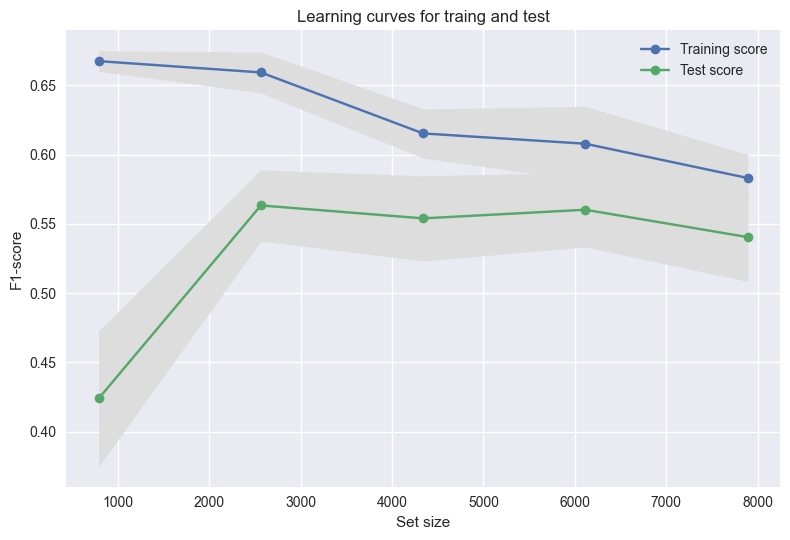

In [19]:
# Results and learning_curve

print('F1-scores mean for every fold per set size:')
display(
    size_by_scores(
        train_sizes, {'Train f1': train_mean, 'Test f1': test_mean}
    )
)

plot_learning_curve(
    train_sizes, train_mean, test_mean, train_std, test_std
)

In [20]:
# Random Forest deep 7
rf_7 = ensemble.RandomForestClassifier(
    max_depth=7,
    n_estimators=200,
    min_samples_leaf=5,
    random_state=SEED
)

train_sizes, \
train_scores, \
test_scores, \
train_mean, \
train_std, \
test_mean, \
test_std = \
    CV.cross_validate(
        X_train, y_train, rf_7, cv_method='learning_curve'
    )

F1-scores mean for every fold per set size:


,Fold size,Train f1,Test f1,Diff
0,789,0.787697,0.508973,0.278725
1,2564,0.753162,0.636426,0.116736
2,4340,0.732231,0.630079,0.102152
3,6115,0.710212,0.633528,0.076684
4,7891,0.696132,0.634516,0.061616


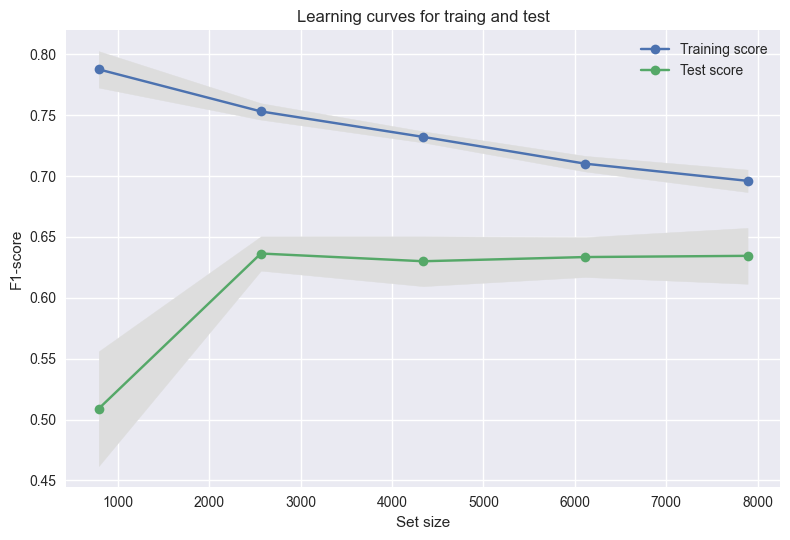

In [21]:
# Results and learning_curve

print('F1-scores mean for every fold per set size:')
display(
    size_by_scores(
        train_sizes, {'Train f1': train_mean, 'Test f1': test_mean}
    )
)

plot_learning_curve(
    train_sizes, train_mean, test_mean, train_std, test_std
)

In [22]:
# Random Forest deep 12
rf_12 = ensemble.RandomForestClassifier(
    max_depth=12,
    n_estimators=200,
    min_samples_leaf=5,
    random_state=SEED
)

train_sizes, \
train_scores, \
test_scores, \
train_mean, \
train_std, \
test_mean, \
test_std = \
    CV.cross_validate(
        X_train, y_train, rf_12, cv_method='learning_curve'
    )

F1-scores mean for every fold per set size:


,Fold size,Train f1,Test f1,Diff
0,789,0.778511,0.532905,0.245605
1,2564,0.811251,0.645197,0.166054
2,4340,0.805299,0.639280,0.166018
3,6115,0.801236,0.654931,0.146304
4,7891,0.791154,0.652146,0.139007


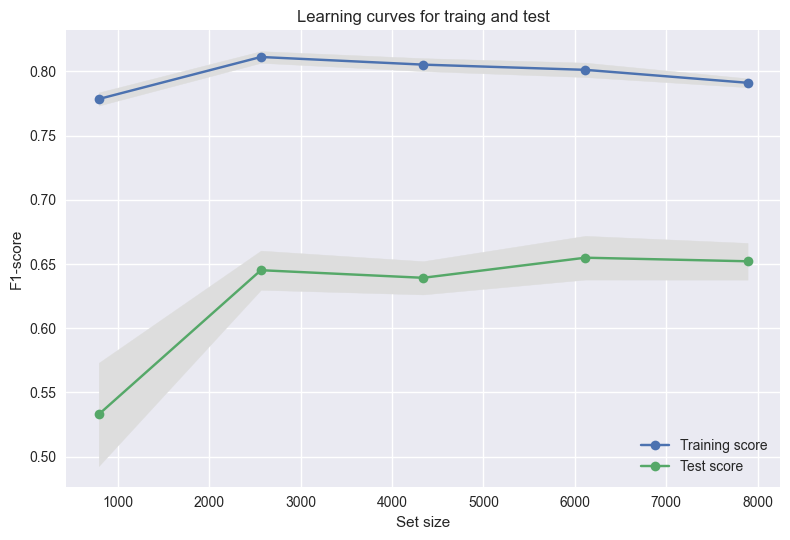

In [23]:
# Results and learning_curve

print('F1-scores mean for every fold per set size:')
display(
    size_by_scores(
        train_sizes, {'Train f1': train_mean, 'Test f1': test_mean}
    )
)

plot_learning_curve(train_sizes, train_mean, test_mean, train_std, test_std)

13. Из построенных кривых обучения сделайте вывод: какая глубина деревьев в лесу является оптимальной? Ответ обоснуйте

> По построенным кривым обучения можно сделать следующие выводы.
> 
> Наиболее оптимальной глубиной дерева из 3х представленных является глубина, равная 7, поскольку в этом случае разница между F1 на тренировочной и тестовой выборках является наиболее оптимальной по сравнению с остальными моделями.
> 
> Так, не смотря на то, что при глубине в 5 разница между скорами меньше, суммарно, f1 метрика на моделе rf_7 выше, а также разброс среднего в рамках стандартного отклонения у rf_7 также меньше.
> 
> Судя по метрикам, модель на глубину 12 подстроилась под train данные, т.е. - переобучилась.
> 
> Таким образом, из трех представленных моделей наиболее оптимальной является модель с глубиной в 7.


14. Обучите случайный лес с выбранной в предыдущем задании оптимальной глубиной на тренировочной выборке. Сделайте предсказание меток классов и выведите отчёт о метриках классификации.

Рассчитайте значение метрики accuracy

15. Рассчитайте значение метрики F1 для посетителей, завершивших сессию без покупки товара?

16. Рассчитайте значение метрики F1 для посетителей, купивших товар во время сессии?

In [24]:
# We realized that the model with max_deep = 7 is the best
# Let's fit it on all train

rf_7.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, n_estimators=200,
                       random_state=42)

In [25]:
# And predict test with full report of all metrics
y_test_pred = rf_7.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2084
        True       0.80      0.49      0.61       382

    accuracy                           0.90      2466
   macro avg       0.86      0.74      0.78      2466
weighted avg       0.90      0.90      0.89      2466



> - F1-score для тех, кто завершил сессию без покупки товара, равен 0.94
> - F1-score для тех, кто завершил сессию купив товар, равен 0.61

17. Напишите вывод по полученным значениям

> F1 метрика, в нашем случае с большим дисбалансом классов, дает более правдоподобную картину, чем accuracy.
>
> Так, можно сделать вывод о том, что модель значительно лучше предсказывает клиентов, которые завершили сессию без покупки товара, что может быть обусловлено бОльшим количеством данных по этому классу.
>
> При этом точность предсказания высока для обоих классов.
> 
> На ряду с тем, модель хуже всего определяет покупателей, совершивших покупку относительно полноты.

18. Попробуем повысить качество распознавания посетителей, совершивших покупку. Используем метод подбора порога вероятности с помощью PR-кривой.

Порог вероятности будем подбирать с помощью кросс-валидации.

Сделайте предсказание вероятностей принадлежности к пользователям, которые совершат покупку, на кросс-валидации на пяти фолдах. Используйте метод cross_val_predict().

Для кросс-валидации используйте случайный лес с подобранной в прошлых заданиях оптимальной максимальной глубиной деревьев, набор данных (параметры X, y) — тренировочная выборка (X_train, y_train).

Постройте PR-кривую и отметьте на ней точку, в которой наблюдается максимум метрики  для посетителей, которые совершат покупку. Определите порог вероятности, соответствующий этой точке.

In [26]:
# Probability for class 1
y_pred_proba = model_selection.cross_val_predict(
    rf_7, X_train, y_train, cv=5, method='predict_proba'
)[:, 1]

y_pred_proba

array([0.32978208, 0.04004348, 0.02642277, ..., 0.0115439 , 0.5210891 ,
       0.67714724])

In [27]:
# Calculate thresholds

y_train_pred_proba = pd.Series(y_pred_proba)
recall_scores = []
precision_scores = []
f1_scores = []

thresholds = np.arange(0.1, 1, 0.05)

for threshold in thresholds:
    y_train_pred = y_train_pred_proba.apply(
        lambda pred: (pred>threshold).astype(int)
    )

    recall_scores.append(metrics.recall_score(y_train, y_train_pred))
    precision_scores.append(metrics.precision_score(y_train, y_train_pred))
    f1_scores.append(metrics.f1_score(y_train, y_train_pred))


/Users/polina/Desktop/SKMaga/.g_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/polina/Desktop/SKMaga/.g_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/polina/Desktop/SKMaga/.g_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [28]:
# To get best threshold as the balances the F1, recall and precision


np_recall_scores = np.array(recall_scores)
np_precision_scores = np.array(precision_scores)
np_f1_scores = np.array(f1_scores)

diffs = \
    np.abs(np_recall_scores - np_precision_scores) \
    + np.abs(np_recall_scores - np_f1_scores) \
    + np.abs(np_precision_scores - np_f1_scores)

sorted_diffs_idxs = np.argsort(diffs)

scores_data = pd.DataFrame({
    'diffs': diffs[sorted_diffs_idxs],
    'thresholds': thresholds[sorted_diffs_idxs],
    'recall_scores': np_recall_scores[sorted_diffs_idxs],
    'precision_scores': np_precision_scores[sorted_diffs_idxs],
    'f1_scores': np_f1_scores[sorted_diffs_idxs]
})


# Sort by minimum diff and max f1_score
scores_data = scores_data.sort_values(
    by=['diffs', 'f1_scores'], ascending=[True, False]
)

# Drop f1_score = 0
scores_data = scores_data[scores_data.f1_scores > 0]


scores_data.head()

,diffs,thresholds,recall_scores,precision_scores,f1_scores
3,0.037199,0.40,0.673657,0.692256,0.682830
4,0.164973,0.35,0.731324,0.648837,0.687616
5,0.256314,0.45,0.601573,0.729730,0.659483
6,0.298988,0.30,0.766055,0.616561,0.683226
7,0.429801,0.25,0.804718,0.589817,0.680710


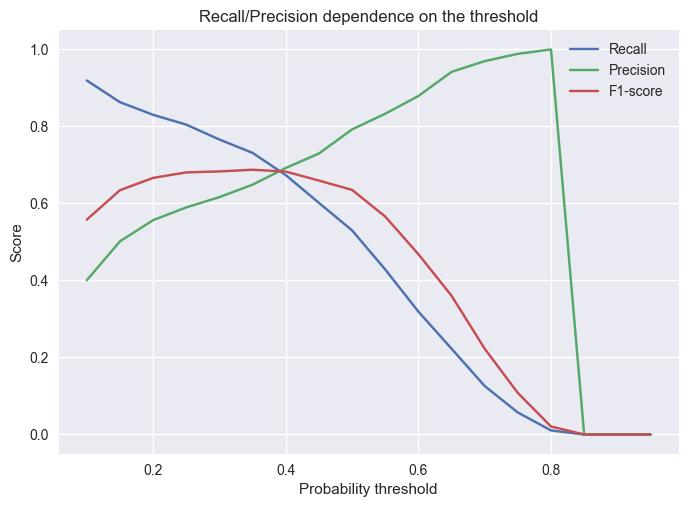

In [29]:
# Get PR visualizations

plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, f1_scores, label='F1-score')

plt.title('Recall/Precision dependence on the threshold')
plt.xlabel('Probability threshold')
plt.ylabel('Score')
plt.legend(loc='best')

> Из таблицы и графика видно, что наименьшая разница в метриках при наибольших их значениях достигается при threshold равном 0.35

19. Сделайте предсказание классов объекта с определённым в предыдущем задании порогом вероятности. Выведите отчёт о метриках классификации.
Рассчитайте значение метрики accuracy

In [30]:
threshold_opt = 0.35

y_test_pred_proba = rf_7.predict_proba(X_test)[:, 1]

y_test_pred_opt = (y_test_pred_proba >= threshold_opt).astype(int)

In [31]:
print('PREDICTION WITH DEFAULT THRESHOLD:')
print(metrics.classification_report(y_test, y_test_pred))

print('PREDICTION WITH OPTIMIZED THRESHOLD:')
print(metrics.classification_report(y_test, y_test_pred_opt))

PREDICTION WITH DEFAULT THRESHOLD:
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2084
        True       0.80      0.49      0.61       382

    accuracy                           0.90      2466
   macro avg       0.86      0.74      0.78      2466
weighted avg       0.90      0.90      0.89      2466

PREDICTION WITH OPTIMIZED THRESHOLD:
              precision    recall  f1-score   support

       False       0.94      0.93      0.94      2084
        True       0.65      0.70      0.67       382

    accuracy                           0.90      2466
   macro avg       0.80      0.81      0.81      2466
weighted avg       0.90      0.90      0.90      2466



In [32]:
# Control overfit check on cross validation

CV.cross_validate(X_train, y_train, rf_7)

For 1 fold:
	-Train: 0.693579766536965
	-Test: 0.6301369863013698
For 2 fold:
	-Train: 0.682806324110672
	-Test: 0.6549707602339181
For 3 fold:
	-Train: 0.6918177364037237
	-Test: 0.6265560165975104
For 4 fold:
	-Train: 0.7091787439613526
	-Test: 0.5980582524271845
For 5 fold:
	-Train: 0.7066155321188878
	-Test: 0.6653992395437263


(np.float64(0.6967996206263203), np.float64(0.6350242510207418))

> Можно заключить, что переобучение в финальной моделе не наблюдается

20. Рассчитайте значение метрики F1 для посетителей, завершивших сессию без покупки товара и значение метрики F1 для посетителей, купивших товар во время сессии? После расчета напишите свои выводы на основе метрик

> После установления оптимального threshold порога значение метрик для посетителей в целом выровнилось как для купивших, так для некупивших товары.
> 
> Можно также заметить, что f1 метрика для посетителей, купивших товары, выросла на 6% за счет болеее точного предсказания полноты оптимизационной модели: recall равен 70% против 49% на дефолтном threshold.
> Такое значительно увеличение во много продиктовано тем, что оптимизационная модель более сбалансирована в части f1 меры.
>
> Таким образом, данное решение стоит принять в том случае, если мы готовы существенно потерять в точности в угоду более полного определения покупателей, совершивших покупку. На мой взгляд, здесь это может быть оправдано повышением f1 метрики, отражающей степень баланса между precision и recall